This is a script for geocoding and plotting spatial information from an EXCEL spreadsheet with an "Addresses" column. The API used is **GeoNames.**

GeoNames is mainly using REST APIs. It offers 40 different webservices.

**Geocoder** for Python supports the following ones:

*   (geocoding) retrieve GeoNames’s geocoded data from a query string, and 
various filters
*   (details) retrieve all geonames data for a given geonames_id
*   (children) retrieve the hierarchy of a given geonames_id
*   (hierarchy) retrieve all children for a given geonames_id

Full documentation: https://geocoder.readthedocs.io/providers/GeoNames.html

The first step is to get COLAB working:


In [22]:
## mount drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


A file path needs to be defined for storing input or output files linked with this script:

In [23]:
directory="/content/drive/My Drive/Colab_Geohumanities/"

Now we can install packages that are not part of Python's standard distribution but are necessary for geocoding and plotting maps. There will most likely be a dependency error for NumPy, but the script should still work.

In [28]:
## install packages that are not part of Python's standard distribution

!pip install geocoder
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now that all packages are installed, we can read the input data (in this case from Github or Google Drive) and display the content in a table.

In [30]:
## import relevant packages
import pandas as pd
import geocoder
# command needed for correct plotting in Jupyter Notebooks:
%matplotlib inline 
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os

## geocode data from spreadsheet

# input addresses in EXCEL format and read
infile="https://github.com/MonikaBarget/GeoHumTutorials/blob/master/Colab_Geocoding/Addresses_AP3.xlsx?raw=true"
#infile=directory+"Addresses.xlsx" # alternative input from Google Drive
addresses_df = pd.read_excel(infile)
display(addresses_df)

,Addresses
0,Aachen
1,Abderode
2,Alach
3,Algesheim
4,Altdorf
...,...
169,Wien
170,Worbis
171,Worms
172,Würzburg


Now we will use the Pandas package to read the content of the address column to a so-called DataFrame. A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet. This 2-dimensional structure is often used to manipulate data with programming languages. Our "manipulation" is the act of geocoding.

In [32]:
# read information from address column to dataframe
addresses = addresses_df["Addresses"].values.tolist()

latitudes = []
longitudes = []
ids = []
g_addresses = []

# geocode each address in file
for address in addresses:
	try:
		g = geocoder.geonames(address, key="YOURKEY", featureClass='A')

		if g and len(g):
			geonames_address = g.address
			longitude = g.lng
			latitude = g.lat
			id = g.geonames_id
			#print(geonames_address, longitude, latitude, id) # OPTIONAL: print individual output
		else:
			geonames_address = "N/A"
			longitude = "N/A"
			latitude = "N/A"
			id = "N/A"

	# add information to lists
		g_addresses.append(geonames_address)
		latitudes.append(latitude)
		longitudes.append(longitude)
		ids.append(id)

	except ValueError:
		print("No more data in file.")

# write information to new columns in dataframe
addresses_df["latitudes"] = latitudes
addresses_df["longitudes"] = longitudes
addresses_df["ids"] = ids
addresses_df["geonames address"] = g_addresses

print("All addresses geocoded!")


All addresses geocoded!


If all addresses have been successfully geocoded, the next step is to check the geocoding and write the results to a new EXCEL file. 


In [33]:
# view geocoded data
display(addresses_df)

# write geocoded places to new file
addresses_df.to_excel(directory+"Addresses_AP3_Geocoded_withID.xlsx")

,Addresses,latitudes,longitudes,ids,geonames address
0,Aachen,50.75389,6.24194,3247448,Städteregion Aachen
1,Abderode,N/A,N/A,N/A,N/A
2,Alach,N/A,N/A,N/A,N/A
3,Algesheim,49.94992,8.00946,6557928,Gau-Algesheim
4,Altdorf,46.88834,8.64091,7285057,Altdorf (UR)
...,...,...,...,...,...
169,Wien,48.2082,16.37169,2761367,Vienna
170,Worbis,51.37915,10.33333,7602636,Leinefelde-Worbis
171,Worms,49.66306,8.33583,3247467,Kreisfreie Stadt Worms
172,Würzburg,49.7822,9.94041,3220897,Kreisfreie Stadt Würzburg


Now we can plot the geocoded data to a 2-dimensional, static map. As this map is a world-map, the individual places will only be visible as small coloured dots.

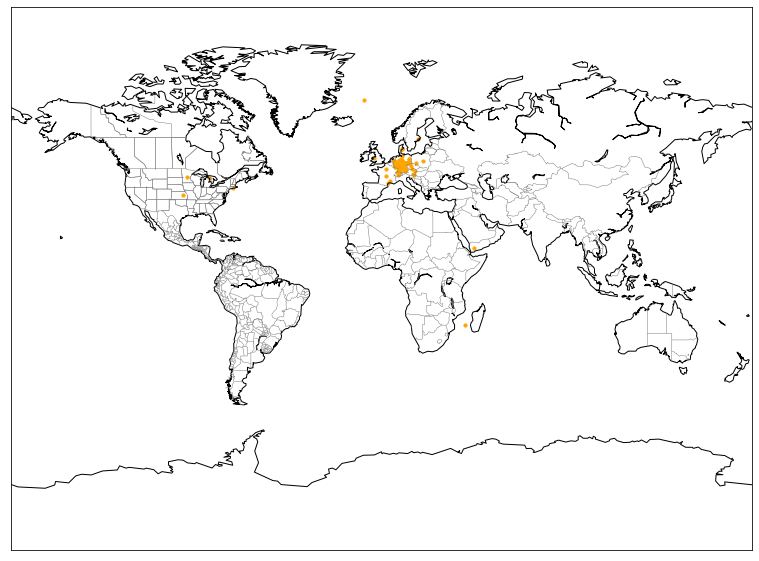

In [37]:
## plot geocoded data

# read file with geocoded data
places = directory+'Addresses_AP3_Geocoded_withID.xlsx'
data = pd.read_excel(places)

# set the size of the map
fig = plt.figure(figsize=(15,10))

# create the map - set latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

# draw the coastline
m.drawcoastlines()
m.drawcountries(color='gray') # OPTIONAL: define color for modern country borders
m.drawstates(color='gray') # OPTIONAL: define color for borders of modern US federal states

# write variables for latitude and longitude to list
lat = data['latitudes'].tolist()
lon = data['longitudes'].tolist()

# plot the map
m.scatter(lon, lat, latlon = True, s = 10, c = 'orange', marker = 'o', alpha = 1)

plt.show()

Congratulations, you have just plotted a new map! You can save the image by rightclicking with your mouse and downloading it to your local drive.
